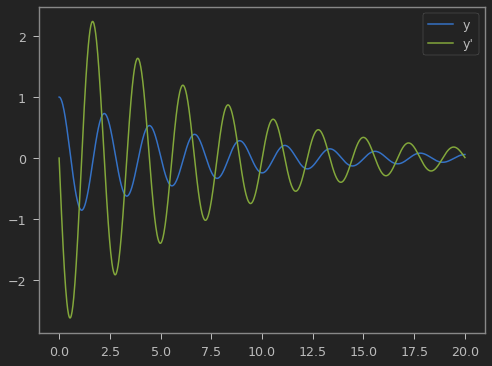

In [3]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

dark_mode = True
# plotting choices for dark-mode ... comment out if not using dark mode!!!
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

mass = 0.5  # kg
kspring = 4  # N/m
bviscous = 0.1 * np.sqrt(4.0*mass*kspring)  # N s/m


eps = bviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)


def calc_deri(yvec, time, eps, omega):
    return (yvec[1], -eps * omega * yvec[1] - omega **2 * yvec[0])

time_vec = np.linspace(0, 20, 1000)
yinit = (1, 0)

yarr = odeint(calc_deri, yinit, time_vec, args=(eps, omega))

plt.figure(figsize=(8, 6))
plt.plot(time_vec, yarr[:, 0], label='y')
plt.plot(time_vec, yarr[:, 1], label="y'")
plt.legend(loc='best')
plt.show()


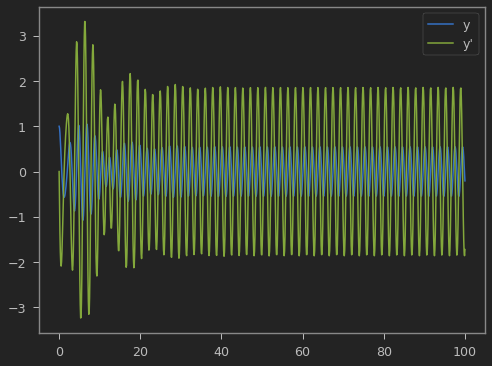

In [4]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

mass = 0.5  # kg
kspring = 4  # N/m
bviscous = 0.1 * np.sqrt(4.0*mass*kspring)  # N s/m

eps = bviscous / (2 * mass * np.sqrt(kspring/mass))
omega0 = np.sqrt(kspring / mass)

f0 = 1.0
omega = 1.2*omega0

def calc_deri(yvec, time, eps, omega0, mass, omega, f0):
    fd = f0/mass*np.sin(omega*time)
    return (yvec[1], -eps * omega0 * yvec[1] - omega0 **2 * yvec[0] + fd)

time_vec = np.linspace(0, 100, 1000)
yinit = (1, 0)

yarr = odeint(calc_deri, yinit, time_vec, args=(eps, omega0, mass, omega, f0))

plt.figure(figsize=(8, 6))
plt.plot(time_vec, yarr[:, 0], label='y')
plt.plot(time_vec, yarr[:, 1], label="y'")
plt.legend(loc='best')
plt.show()

